In [1]:
pip install opencv-python numpy matplotlib


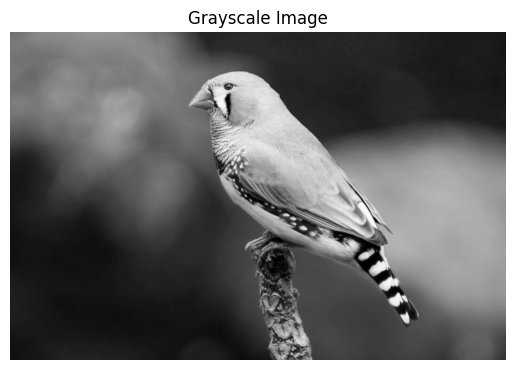

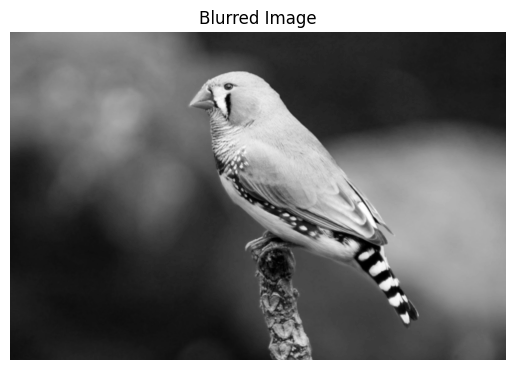

Blurred image saved to /Users/praneeth/Desktop/INFOSYS/blurred_birds.jpg


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Image Acquisition - Read the image
image_path = '/000001.jpg'  # Path to the image file

# Check if the image was loaded successfully
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
if image is None:
    print(f"Error: Could not load image from {image_path}. Please check the path and file permissions.")
    exit()  # Exit the script if image loading fails

# Step 2: Display the image using Matplotlib
plt.imshow(image, cmap='gray')  # Display the image in grayscale
plt.axis('off')  # Hide the axis
plt.title('Grayscale Image')  # Title for the image
plt.show()  # Show the image

# Step 3: Additional Processing (Optional)
# For example, you can apply Gaussian Blur
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Display the blurred image
plt.imshow(blurred_image, cmap='gray')
plt.axis('off')
plt.title('Blurred Image')
plt.show()

# Step 4: Save the processed image (Optional)
output_path = '/Users/praneeth/Desktop/INFOSYS/blurred_birds.jpg'
cv2.imwrite(output_path, blurred_image)
print(f"Blurred image saved to {output_path}")

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale mode
image = cv2.imread('/000001.jpg', cv2.IMREAD_GRAYSCALE)

# Check if the image is loaded successfully
if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")


Image loaded successfully with shape: (1058, 1600)


Image loaded successfully with shape: (731, 1300)


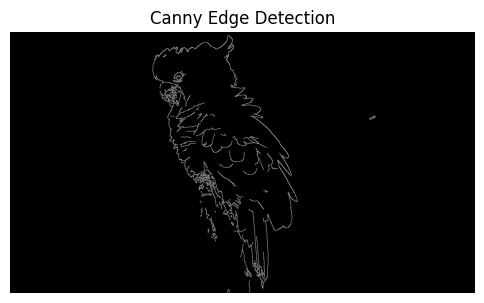

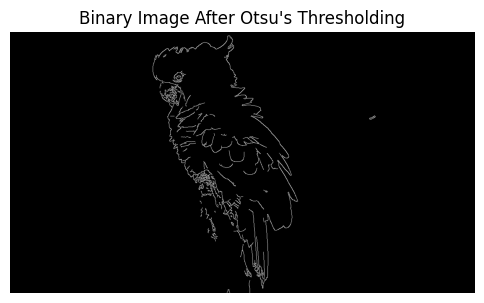

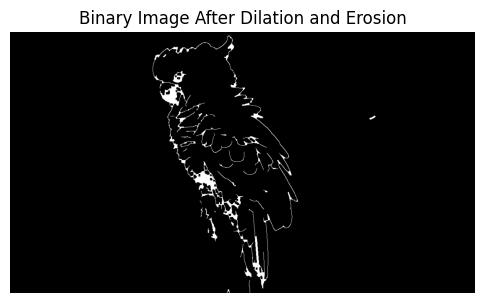

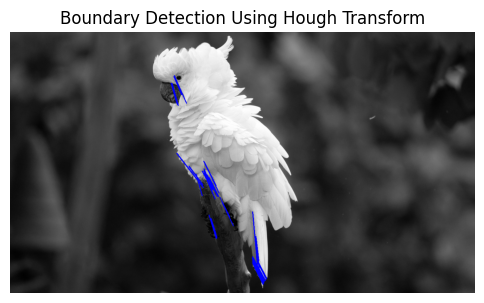

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = cv2.imread('/000002.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Canny Edge Detection)
    edges = cv2.Canny(image, 100, 200)

    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Canny Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    _, binary_image = cv2.threshold(edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Boundary Detection (Hough Transform)
    lines = cv2.HoughLinesP(eroded, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=10)

    # Create a color copy of the image to draw the lines
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(output_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Display the image with detected boundaries
    plt.figure(figsize=(6, 6))
    plt.imshow(output_image)
    plt.title("Boundary Detection Using Hough Transform")
    plt.axis('off')
    plt.show()


Image loaded successfully with shape: (731, 1300)


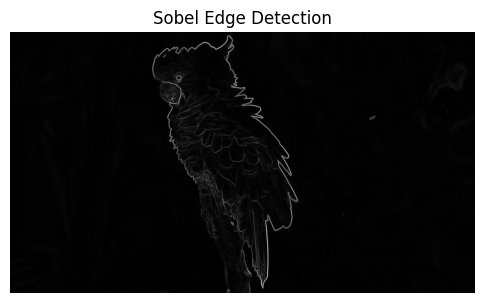

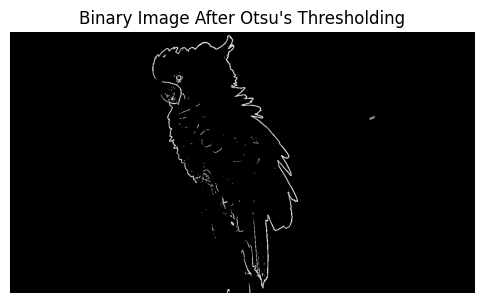

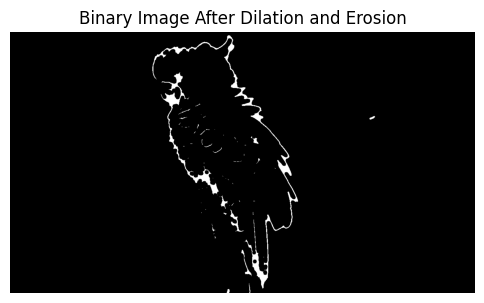

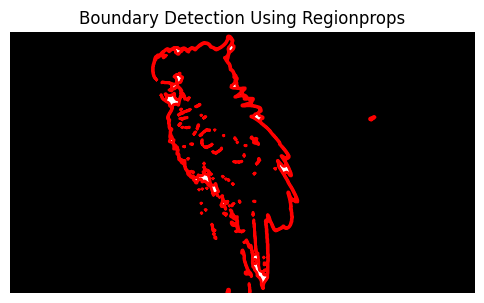

In [5]:
from skimage import io, filters, morphology, measure
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = io.imread('/000002.jpg', as_gray=True)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Sobel Edge Detection)
    edges = filters.sobel(image)

    plt.figure(figsize=(6, 6))
    plt.imshow(edges, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    threshold_value = filters.threshold_otsu(edges)
    binary_image = edges > threshold_value

    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    dilated = morphology.dilation(binary_image, morphology.disk(5))
    eroded = morphology.erosion(dilated, morphology.disk(5))

    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Boundary Detection (Using Regionprops to detect contours)
    contours = measure.find_contours(eroded, level=0.8)

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(eroded, cmap='gray')

    for contour in contours:
        ax.plot(contour[:, 1], contour[:, 0], color='red', linewidth=2)

    plt.title("Boundary Detection Using Regionprops")
    plt.axis('off')
    plt.show()


Image loaded successfully with shape: (731, 1300)


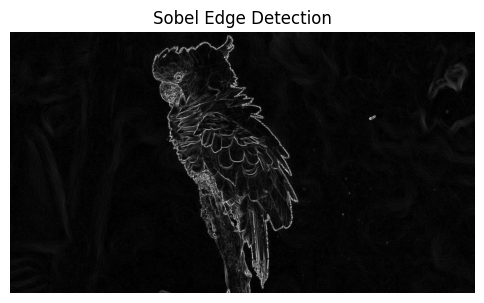

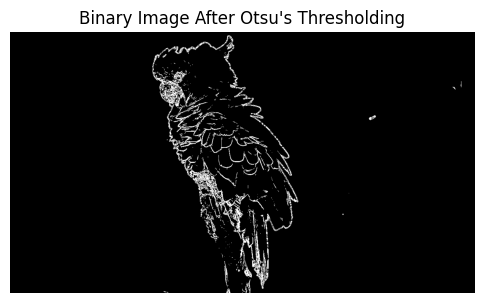

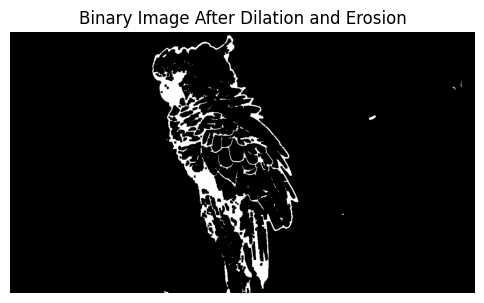

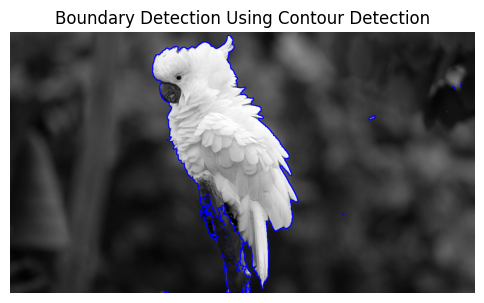

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Image Acquisition (Load the image)
image = cv2.imread('/000002.jpg', cv2.IMREAD_GRAYSCALE)

if image is None:
    print("Error: Image not found.")
else:
    print(f"Image loaded successfully with shape: {image.shape}")

    # 2. Edge Detection (Sobel Edge Detection)
    # Apply Sobel edge detection to detect edges in both horizontal (dx) and vertical (dy) directions.
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in the x-direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in the y-direction

    # Compute the magnitude of the gradient
    sobel_edges = cv2.magnitude(sobel_x, sobel_y)

    # Convert the magnitude to a scale of 0-255 and convert back to uint8
    sobel_edges = np.uint8(np.absolute(sobel_edges))

    # Display the Sobel edges
    plt.figure(figsize=(6, 6))
    plt.imshow(sobel_edges, cmap='gray')
    plt.title("Sobel Edge Detection")
    plt.axis('off')
    plt.show()

    # 3. Binary Conversion (Otsu's Thresholding)
    _, binary_image = cv2.threshold(sobel_edges, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Display the binary image
    plt.figure(figsize=(6, 6))
    plt.imshow(binary_image, cmap='gray')
    plt.title("Binary Image After Otsu's Thresholding")
    plt.axis('off')
    plt.show()

    # 4. Binary Image Preprocessing (Morphological Operations)
    kernel = np.ones((5, 5), np.uint8)
    dilated = cv2.dilate(binary_image, kernel, iterations=1)
    eroded = cv2.erode(dilated, kernel, iterations=1)

    # Display the preprocessed binary image
    plt.figure(figsize=(6, 6))
    plt.imshow(eroded, cmap='gray')
    plt.title("Binary Image After Dilation and Erosion")
    plt.axis('off')
    plt.show()

    # 5. Contour Detection (Find and Draw Contours)
    contours, hierarchy = cv2.findContours(eroded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create a color copy of the original image to draw the contours
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

    # Draw the contours on the image
    cv2.drawContours(output_image, contours, -1, (0, 0, 255), 2)  # Red contours with thickness of 2

    # Display the image with detected contours
    plt.figure(figsize=(6, 6))
    plt.imshow(output_image)
    plt.title("Boundary Detection Using Contour Detection")
    plt.axis('off')
    plt.show()
